In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import os
import sklearn

In [2]:
import pathlib 
cancer_dir = pathlib.Path("data/unhealthy")
normal_dir = pathlib.Path("data/healthy")

In [3]:
dirlist=[cancer_dir,normal_dir ]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  9512    labels:  9512


In [4]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(9512,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,data\unhealthy\WBC-Malignant-Early-001.jpg,No
1,data\unhealthy\WBC-Malignant-Early-002.jpg,No
2,data\unhealthy\WBC-Malignant-Early-003.jpg,No
3,data\unhealthy\WBC-Malignant-Early-004.jpg,No
4,data\unhealthy\WBC-Malignant-Early-005.jpg,No


In [5]:
print(df['labels'].value_counts())

labels
No     5504
Yes    4008
Name: count, dtype: int64


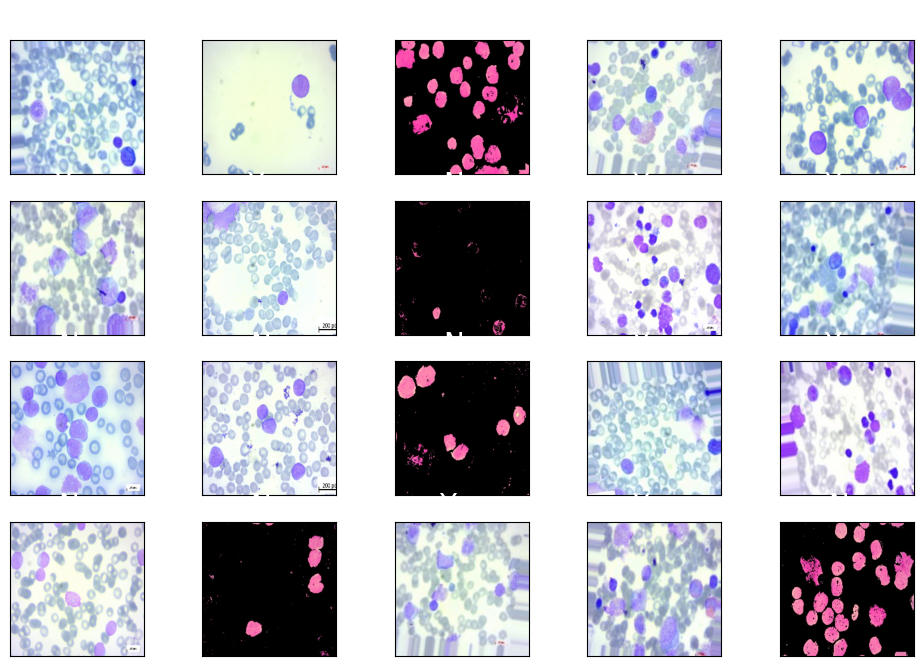

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image  # Import PIL for image loading

# Assuming 'df' is your DataFrame containing image file paths and labels
plt.figure(figsize=(12,8))

for i in range(20):
    random = np.random.randint(1, len(df))  # Random index
    img_path = df.loc[random, "filepaths"]  # Get image path
    img = Image.open(img_path)  # Open image using PIL
    
    plt.subplot(4,5,i+1)  # 4 rows, 5 columns
    plt.imshow(img)  # Display the image
    plt.title(df.loc[random, "labels"], size=20, color="white")  # Display label
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    
plt.show()  # Show all images


In [7]:
import os
import numpy as np
from PIL import Image  # Use PIL for image reading and resizing

labels = ['CANCER', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                # Open image using PIL
                img_path = os.path.join(path, img)
                img_arr = Image.open(img_path).convert('L')  # Convert to grayscale
                resized_arr = img_arr.resize((img_size, img_size))  # Resize the image
                data.append([np.array(resized_arr), class_num])  # Convert to array and store
                
            except Exception as e:
                print(e)
    
    return np.array(data)


In [8]:
import glob
images_dict = {
    'cancer': list(cancer_dir.glob('*')) ,   
    'normal': list(normal_dir.glob('*'))  
}

labels_dict = {
    'cancer': "cancer",
    'normal': "normal",
    
}

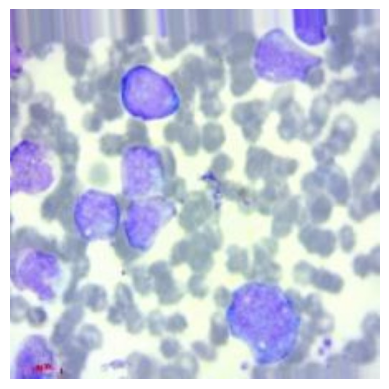

In [9]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming images_dict contains paths or filenames of images
img_path = str(images_dict['normal'][0])

# Open image using PIL
img = Image.open(img_path)

# Convert to NumPy array for use in Matplotlib and TensorFlow
img_array = np.array(img)

# Display the image using Matplotlib
plt.imshow(img_array)
plt.axis('off')  # Hide axes for cleaner visualization
plt.show()


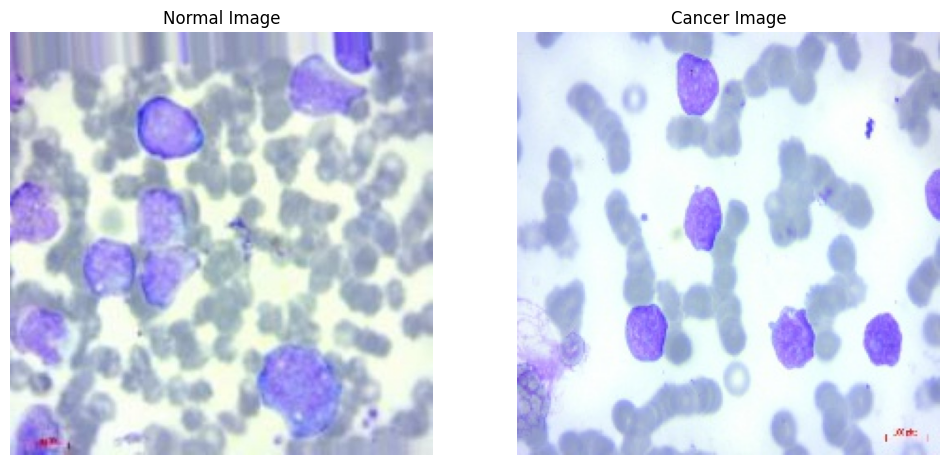

In [10]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming images_dict contains paths to image files
img_path = str(images_dict['normal'][0])  # Example for normal image
img_path2 = str(images_dict['cancer'][0])  # Example for cancer image

# Open images using PIL
img1 = Image.open(img_path)
img2 = Image.open(img_path2)

# Convert to NumPy arrays for displaying with Matplotlib
img1_array = np.array(img1)
img2_array = np.array(img2)

# Display both images using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img1_array)
ax[0].set_title('Normal Image')
ax[0].axis('off')  # Hide axes

ax[1].imshow(img2_array)
ax[1].set_title('Cancer Image')
ax[1].axis('off')  # Hide axes

plt.show()


In [11]:
X, y = [], []
for name,images in images_dict.items():
    for image in images:
        img=str(image)
        
        X.append(img)
        y.append(labels_dict[name])

In [12]:
Fseries = pd.Series(X, name="filepaths",dtype=str)
Lseries = pd.Series(y, name="labels",dtype=str)
cancer_data = pd.concat([Fseries,Lseries], axis=1)
cancer_df = pd.DataFrame(cancer_data)

print(cancer_df.head())
print("---------------------")
print(cancer_df["labels"].value_counts())

                                    filepaths  labels
0  data\unhealthy\WBC-Malignant-Early-001.jpg  cancer
1  data\unhealthy\WBC-Malignant-Early-002.jpg  cancer
2  data\unhealthy\WBC-Malignant-Early-003.jpg  cancer
3  data\unhealthy\WBC-Malignant-Early-004.jpg  cancer
4  data\unhealthy\WBC-Malignant-Early-005.jpg  cancer
---------------------
labels
cancer    5504
normal    4008
Name: count, dtype: int64


In [14]:
cancer_df.shape

(9512, 2)

In [15]:
from sklearn.model_selection import train_test_split
train_images, test_images = train_test_split(cancer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(cancer_df, test_size=0.2, random_state=42)

In [16]:
print(train_images.shape)
print(test_images.shape)
print(train_set.shape)
print(val_set.shape)

(6658, 2)
(2854, 2)
(7609, 2)
(1903, 2)


In [17]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=32,
                                      shuffle=False            
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 6658 validated image filenames belonging to 2 classes.
Found 2854 validated image filenames belonging to 2 classes.
Found 1903 validated image filenames belonging to 2 classes.


In [18]:
classes=list(train.class_indices.keys())
print (classes)

['cancer', 'normal']


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,losses
cnn= Sequential([
                        
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(244,244,3)),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dropout(rate=0.3),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(2, activation="sigmoid")

])

d:\Projects\Bilstrim and other 4 models\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 244, 244, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 119072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    15,241,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,259,874 (58.21 MB)

 Trainable params: 15,259,874 (58.21 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
History = cnn.fit(train, validation_data= val, epochs=10,verbose=1)

Epoch 1/10


d:\Projects\Bilstrim and other 4 models\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 79s 371ms/step - accuracy: 0.6749 - loss: 1.1222 - val_accuracy: 0.8928 - val_loss: 0.2610
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 77s 369ms/step - accuracy: 0.8998 - loss: 0.2516 - val_accuracy: 0.9175 - val_loss: 0.1881
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 79s 378ms/step - accuracy: 0.9425 - loss: 0.1473 - val_accuracy: 0.9228 - val_loss: 0.2011
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 79s 377ms/step - accuracy: 0.9570 - loss: 0.1011 - val_accuracy: 0.9222 - val_loss: 0.2751
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 78s 375ms/step - accuracy: 0.9700 - loss: 0.0817 - val_accuracy: 0.9364 - val_loss: 0.2328
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 78s 373ms/step - accuracy: 0.9779 - loss: 0.0630 - val_accuracy: 0.9275 - val_loss: 0.2269
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 79s 377ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9338 - val_loss: 0.2607
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 78s 373ms/step - accuracy: 0.9933 - loss: 0.0201 - val

In [23]:
cnn.evaluate(test)

90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.9329 - loss: 0.4308


[0.42425957322120667, 0.9344779253005981]

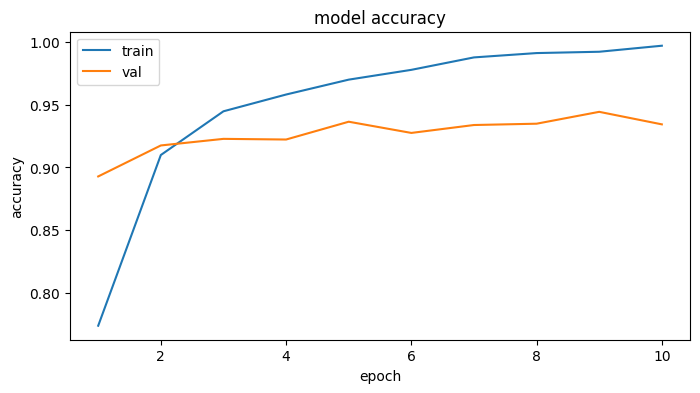

In [24]:
plt.figure(figsize=(8,4))
epochs=range(1,len(History.history['val_accuracy'])+1)

plt.plot(epochs,History.history["accuracy"])
plt.plot(epochs,History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

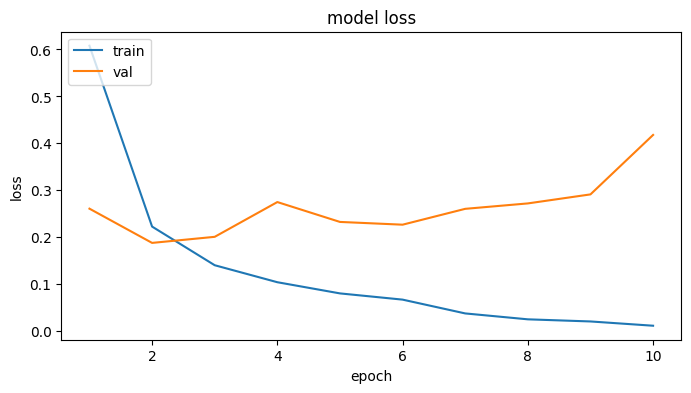

In [25]:
plt.figure(figsize=(8,4))
epochs=range(1,len(History.history['val_loss'])+1)

plt.plot(epochs,History.history["loss"])
plt.plot(epochs,History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
predict_classes = np.argmax(cnn.predict(test), axis= -1)

90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step


In [27]:
from sklearn.metrics import confusion_matrix
y_list = test_images['labels'].to_list()
y_test = []
for i in range(len(y_list)):
    if y_list[i] == 'normal':
        y_test.append(0)
    else:
        y_test.append(1)
y_test = np.array(y_test)
cm = confusion_matrix(y_test, predict_classes)
cm

array([[ 152, 1059],
       [1608,   35]])

In [28]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

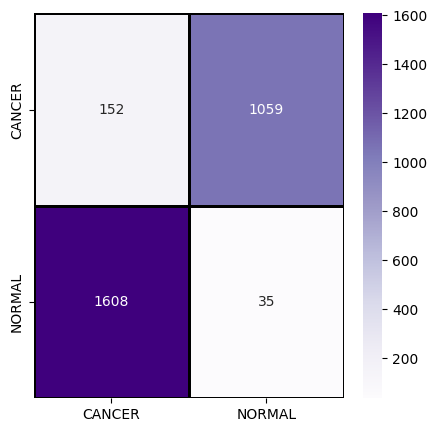

In [29]:
from keras.layers import Dense, Conv2D
plt.figure(figsize = (5,5))
sns.heatmap(cm ,cmap= "Purples", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def predict_image(image_path, model, labels):
    """
    Predict if an image is cancer or normal.

    Parameters:
        image_path (str): Path to the input image.
        model (keras.Model): Trained CNN model.
        labels (list): List of class labels.

    Returns:
        str: Predicted class label.
    """
    img = load_img(image_path, target_size=(244, 244))  
    img_array = img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions) 

    return labels[predicted_class]

image_path = "data/healthy/WBC-Benign-009.jpg"

predicted_label = predict_image(image_path, cnn, labels)
print(f"The predicted class for the input image is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The predicted class for the input image is: NORMAL


90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step
AUC Score: 0.02


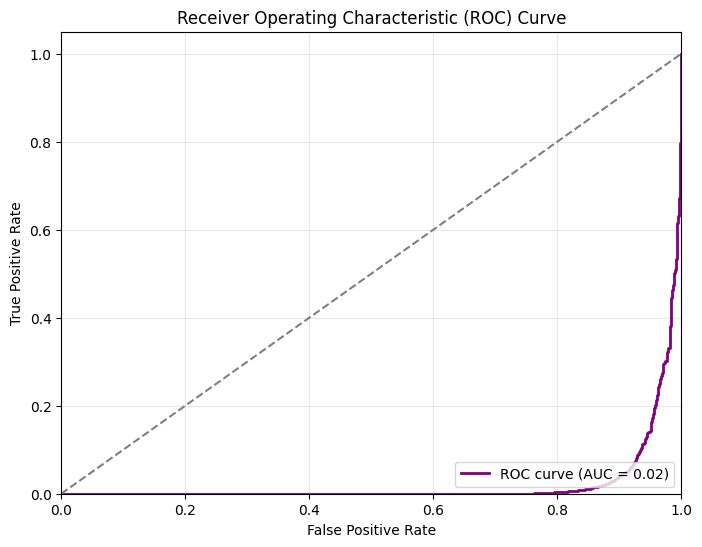

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_pred_probs = cnn.predict(test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="purple", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [37]:
from sklearn.metrics import classification_report

# Convert predicted probabilities to binary class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Threshold at 0.5

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Normal', 'Cancer'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      Normal       0.09      0.13      0.10      1211
      Cancer       0.03      0.02      0.02      1643

    accuracy                           0.06      2854
   macro avg       0.06      0.07      0.06      2854
weighted avg       0.05      0.06      0.06      2854

